In [1]:
import numpy as np
from filterpy.kalman import EnsembleKalmanFilter 
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import time

## Oscillateur harminique


In [2]:
def f(t,X_n,w): #X_n=(x_n,y_n,z_n)
    (u,v)=X_n
    
    f_1 = v
    f_2 =-w**2*u
    return np.array([f_1,f_2])

In [3]:
def RK4_Lorenz(w,X0,N,T): #we have N+1 discretization points

    
    dt=T/N
    
    X = np.zeros( (N+1, len(X0)) )
    T=np.zeros(N+1)
    X[0] = X0
    t=0. #=t_0
    for n in range(1,N+1):
        
        K1=f(t, X[n-1],w)
        K2=f(t+dt/2., X[n-1] + 1./2. * K1 * dt,w)
        K3=f(t+dt/2., X[n-1] + 1./2. * K2 * dt,w)
        K4=f(t+dt, X[n-1]+ K3 * dt,w)
        T[n]=t+dt
        X[n]=X[n-1]+ dt/6.* (K1+2.*K2+2.*K3+K4)
        t+=dt
        
    return X[:,0],X[:,1],T

In [4]:
X_0 = [2,0]


In [5]:
omega = 2
P = 2*np.pi/omega
dt = P/50
T = 3*P
N_t = int(round(T/dt))
lorenz2=RK4_Lorenz(omega,X_0,N_t,T)

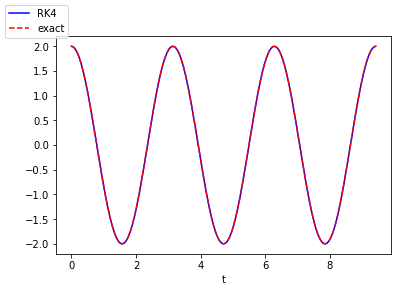

In [6]:
fig = plt.figure()
l1, l2 = plt.plot(lorenz2[2], lorenz2[0], 'b-', lorenz2[2], 2*np.cos(omega*lorenz2[2]), 'r--')
fig.legend((l1, l2), ('RK4', 'exact'), 'upper left')
plt.xlabel('t')
plt.show()

In [7]:

def hx(x):
   return  np.array([x[0]])


def fx(x, dt,w):
    def f(t,X_n,w): #X_n=(x_n,y_n,z_n)
        (u,v)=X_n
        f_1 = v
        f_2 =-w**2*u
        return np.array([f_1,f_2])
    K1=f(t, x,w)
    K2=f(t+dt/2., x + 1./2. * K1 * dt,w)
    K3=f(t+dt/2., x + 1./2. * K2 * dt,w)
    K4=f(t+dt, x+ K3 * dt,w)
    X_next=x+ dt/6.* (K1+2.*K2+2.*K3+K4)
    return X_next

w=2#(σ,b,r)
P = 2*np.pi/w
dt= P/20
T = 3*P
N = int(round(T/dt))

x = np.array([2,0])#(x0,y0,z0)
P = np.eye(2) * 2.

f = EnsembleKalmanFilter (x=x, P=P, dim_z=1, dt=dt, N=40,
         hx=hx, fx=lambda x,dt:fx(x,dt,w))

std_noise = np.eye(1)*0.001 
f.R *= std_noise # matrice de cov associer a la mesure
f.Q=np.eye(2)*0.01 
#f.Q = Q_discrete_white_noise(2, dt, .01) #bruit blanc centree en 0

def read_sensor(t,omega):
     2*np.cos(omega*t)
t=0
tab_etat=[]
tab_temps=[]
while (t<T):
    z = read_sensor(t,omega)
    f.predict()
    f.update(z)
    tab_etat.append(f.x[0])
    tab_temps.append(t)              
    t=t+dt

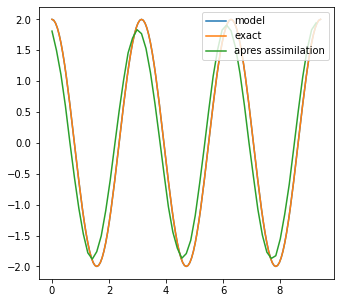

In [8]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(lorenz2[2],lorenz2[0],label='model')
ax1.plot(lorenz2[2], 2*np.cos(omega*lorenz2[2]),label='exact')
ax1.plot(tab_temps,tab_etat,label='apres assimilation')
ax1.legend(loc='upper right')


## Lorenz

In [9]:
def f(t_n,X_n,σ, b, r): #X_n=(x_n,y_n,z_n)
    (x,y,z)=X_n
    
    f_1 = σ*(y-x)
    f_2 = x*(r-z)-y
    f_3 = x*y-b*z
    return np.array([f_1,f_2,f_3])

In [10]:
def RK4_Lorenz(γ,X0,N,T): #we have N+1 discretization points
    (σ,b,r)=γ
    
    dt=T/N
    
    X = np.zeros( (N+1, len(X0)) )
    T=np.zeros(N+1)
    X[0] = X0
    
    t=0. #=t_0
    for n in range(1,N+1):
        
        K1=f(t, X[n-1],σ,b,r)
        K2=f(t+dt/2., X[n-1] + 1./2. * K1 * dt,σ,b,r)
        K3=f(t+dt/2., X[n-1] + 1./2. * K2 * dt,σ,b,r)
        K4=f(t+dt, X[n-1]+ K3 * dt,σ,b,r)
        T[n]=t
        X[n]=X[n-1]+ dt/6.* (K1+2.*K2+2.*K3+K4)
        t+=dt
        
    return X[:,0],X[:,1],X[:,2],T

In [11]:
γ=(12.,6.,12.) #(σ,b,r)
X0=(-10.,-10.,25.) #(x0,y0,z0)
N=int(5/0.01)
T=5

In [12]:
lorenz1=RK4_Lorenz(γ,X0,N,T)

In [13]:
γ=(11.,6.,11.) #(σ,b,r)
X0=(-10.,-10.,25.) #(x0,y0,z0)
N=int(5/0.1)
T=5

In [14]:
lorenz2=RK4_Lorenz(γ,X0,N,T)

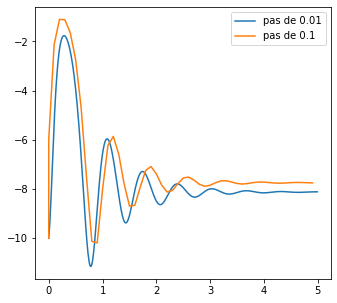

In [15]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(lorenz1[3],lorenz1[0],label="pas de 0.01")
ax1.plot(lorenz2[3],lorenz2[0],label="pas de 0.1")
ax1.legend()

In [16]:

def hx(x):
   return x


def fx(x, dt,σ,b,r):
    def f(t_n,X_n,σ, b, r): #X_n=(x_n,y_n,z_n)
        (x,y,z)=X_n
    
        f_1 = σ*(y-x)
        f_2 = x*(r-z)-y
        f_3 = x*y-b*z
        return np.array([f_1,f_2,f_3])
    K1=f(t, x,σ,b,r)
    K2=f(t+dt/2., x + 1./2. * K1 * dt,σ,b,r)
    K3=f(t+dt/2., x + 1./2. * K2 * dt,σ,b,r)
    K4=f(t+dt, x+ K3 * dt,σ,b,r)
    X_next=x+ dt/6.* (K1+2.*K2+2.*K3+K4)
    return X_next

γ=(11.,6.,11.) #(σ,b,r)
N=10
T=5

x = np.array([-10.,-10.,25.])#(x0,y0,z0)
dt= N*0.01
P = np.eye(3) * 2.


def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])

def assimilation_donnée(x,read_sensor,P,Q,R,dimz,dt,N,nb_echantillon,hx,fx,γ):
    f = EnsembleKalmanFilter (x=x, P=P, dim_z=dimz, dt=dt, N=nb_echantillon,
             hx=hx, fx=lambda x,dt:fx(x,dt,γ[0],γ[1],γ[2]))

    #std_noise = np.eye(3)*0.001 
    f.R = R # matrice de cov associer a la mesure
    f.Q =Q   #bruit blanc  centree en 0
    t=dt  
    index=N
    tab_etat=[]
    tab_temps=[]
    tab_cov=[]
    while (t<T):
        z = read_sensor(index)
        f.predict()
        f.update(z)
        tab_etat.append(f.x)
        tab_temps.append(t)
        diag_cov=f.P_post.diagonal()
        tab_cov.append(diag_cov)
        index+=N                 
        t=t+dt
    return(np.array(tab_etat),np.array(tab_temps),np.array(tab_cov))

In [17]:
def plot_1_fig(lorenz1,lorenz2,ind,tab_temps,tab_cov,diff,tab_x_y_z,labelx,labely):
    fig=plt.figure(figsize=(18,5))
    ax1 = fig.add_subplot(1,3,1)
    ax1.plot(lorenz1[3],lorenz1[ind],label="observation (0.01)")
    ax1.plot(lorenz2[3],lorenz2[ind],label="Model (0.1)")
    ax1.plot(tab_temps,tab_x_y_z[:,ind],color='blue',label="apres l'assimilation de donnée")
    plt.fill_between(tab_temps,tab_x_y_z[:,ind]+(tab_cov[:,ind]+diff),tab_x_y_z[:,ind]-(tab_cov[:,ind]+diff), color='blue',alpha=0.2)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    ax1.legend()

In [18]:
def plot(lorenz1,lorenz2,tab_temps,tab_x_y_z):
    fig=plt.figure(figsize=(18,6))
    ax1 = fig.add_subplot(1,3,1) 
    ax1.plot(lorenz1[3],lorenz1[0],label="observation (0.01)")
    ax1.plot(lorenz2[3],lorenz2[0],label="Model (0.1)")
    ax1.plot(tab_temps,tab_x_y_z[:,0],label="apres l'assimilation de donnée")
    plt.xlabel("t")
    plt.ylabel("x")
    ax1.legend()
    
    ax2 = fig.add_subplot(1,3,2)
    ax2.plot(lorenz1[3],lorenz1[1],label="observation (0.01)")
    ax2.plot(lorenz2[3],lorenz2[1],label="Model (0.1)")
    ax2.plot(tab_temps,tab_x_y_z[:,1],label="apres l'assimilation de donnée")
    plt.xlabel("t")
    plt.ylabel("y")
    ax1.legend()
    
    ax3 = fig.add_subplot(1,3,3)
    ax3.plot(lorenz1[3],lorenz1[2],label="observation (0.01)")
    ax3.plot(lorenz2[3],lorenz2[2],label="Model (0.1)")
    ax3.plot(tab_temps,tab_x_y_z[:,2],label="apres l'assimilation de donnée")
    plt.xlabel("t")
    plt.ylabel("z")
    ax1.legend()
    


### Assimilation juste avec le model

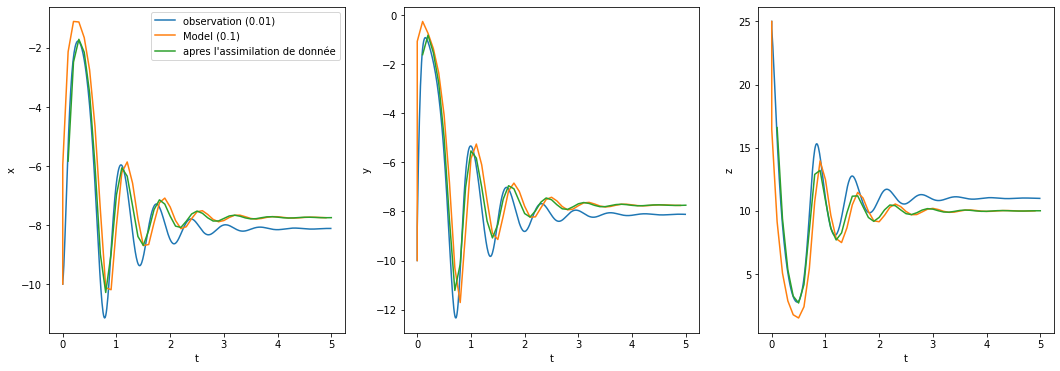

In [19]:
def hx(x):
   return x



R= np.eye(3)*0.01  # matrice de cov associer a la mesure
Q=np.zeros((3,3))
def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])




tab,tab_temps,tab_cov=assimilation_donnée(x,read_sensor,P,Q,R,3,dt,N,40,hx,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab)

### Observation des 3 composantes x,y,z

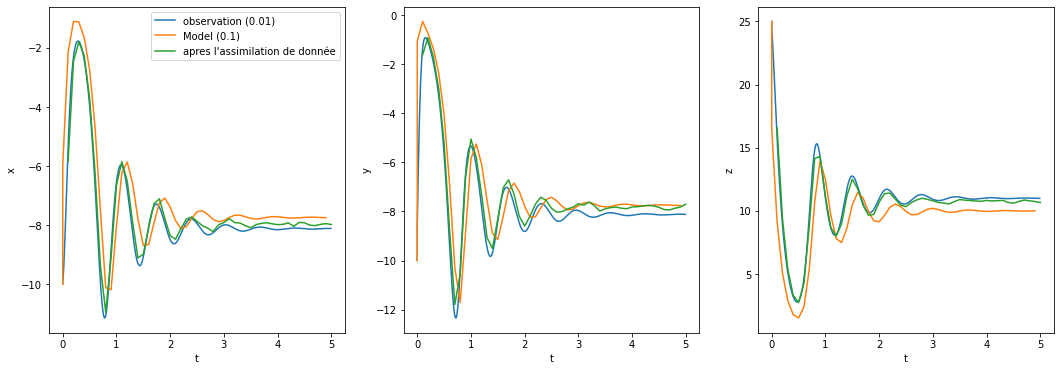

In [39]:
def hx(x):
   return x


Q=np.eye(3)*0.01
R= np.eye(3)*0.01  # matrice de cov associer a la mesure

def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])




tab,tab_temps,tab_cov=assimilation_donnée(x,read_sensor,P,Q,R,3,dt,N,40,hx,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab)

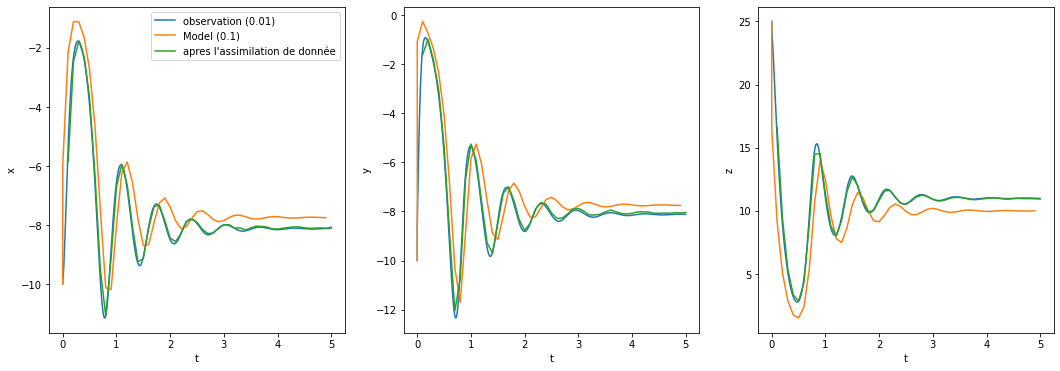

In [40]:
def hx(x):
   return x


Q=np.eye(3)*0.1
R= np.eye(3)*0.01  # matrice de cov associer a la mesure

def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])




tab,tab_temps,tab_cov=assimilation_donnée(x,read_sensor,P,Q,R,3,dt,N,40,hx,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab)

### Observation uniquement de la composantes x

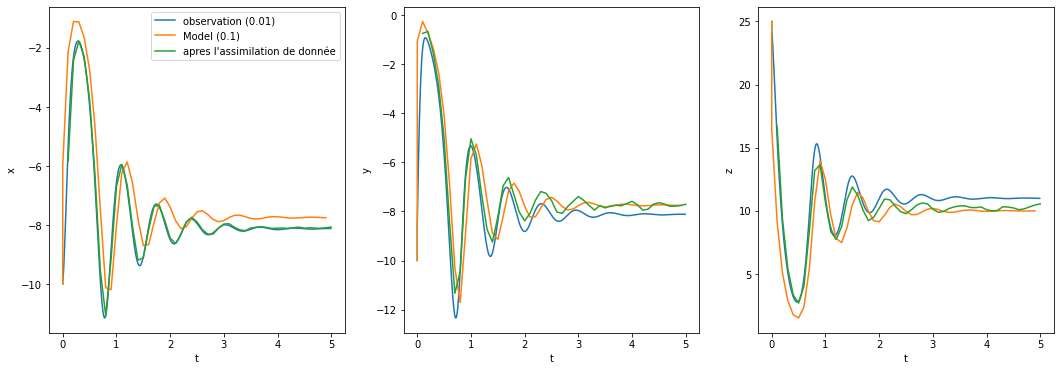

In [41]:
def hx_x(x):
   return np.array([x[0]])



R_x = np.eye(1)*0.01  # matrice de cov associer a la mesure

def read_sensor_x(index):
    return np.array([lorenz1[0][index]])



tab_x,tab_temps,tab_cov_x=assimilation_donnée(x,read_sensor_x,P,Q,R_x,1,dt,N,40,hx_x,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_x)


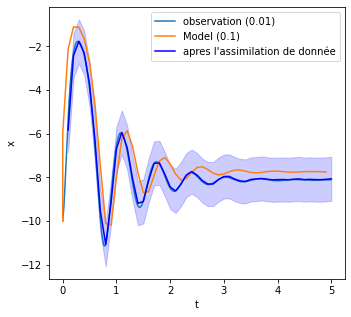

In [42]:
plot_1_fig(lorenz1,lorenz2,0,tab_temps,tab_cov_x,1,tab_x,"t","x")

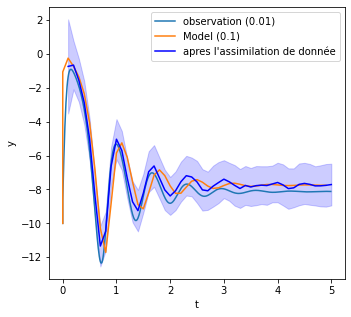

In [43]:
plot_1_fig(lorenz1,lorenz2,1,tab_temps,tab_cov_x,1,tab_x,"t","y")

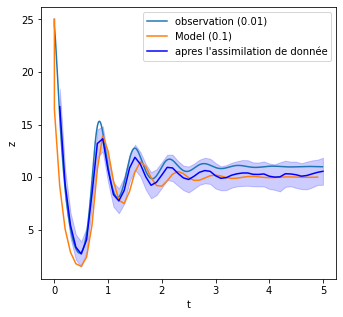

In [44]:
plot_1_fig(lorenz1,lorenz2,2,tab_temps,tab_cov_x,1,tab_x,"t","z")

### Observation uniquement de la composantes z

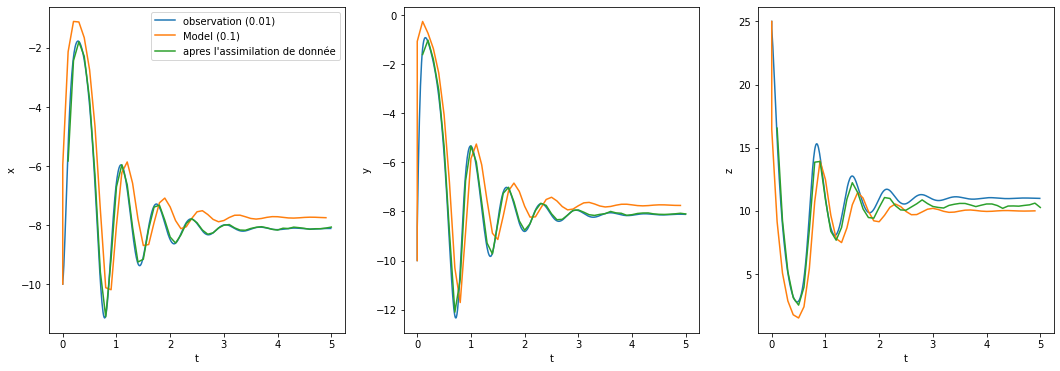

In [45]:
def hx_x_y(x):
   return np.array([x[0],x[1]])



R_x_y = np.eye(2)*0.01  # matrice de cov associer a la mesure

def read_sensor_x_y(index):
    return np.array([lorenz1[0][index],lorenz1[1][index]])



tab_x_y,tab_temps,tab_cov_x_y=assimilation_donnée(x,read_sensor_x_y,P,Q,R_x_y,2,dt,N,40,hx_x_y,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_x_y)



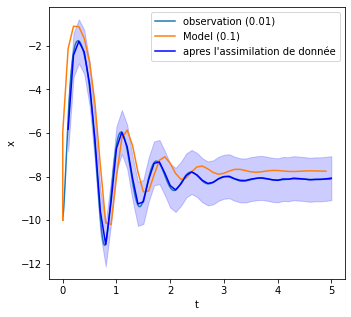

In [46]:
plot_1_fig(lorenz1,lorenz2,0,tab_temps,tab_cov_x_y,1,tab_x_y,"t","x")

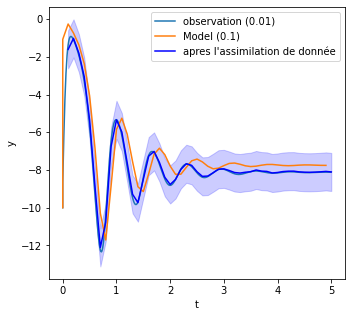

In [47]:
plot_1_fig(lorenz1,lorenz2,1,tab_temps,tab_cov_x_y,1,tab_x_y,"t","y")

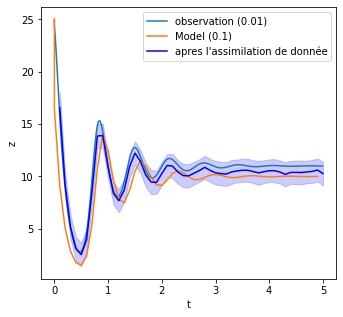

In [48]:
plot_1_fig(lorenz1,lorenz2,2,tab_temps,tab_cov_x_y,1,tab_x_y,"t","z")

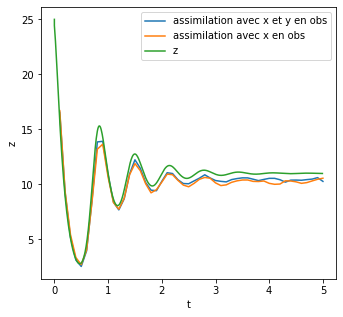

In [49]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(tab_temps,tab_x_y[:,2],label="assimilation avec x et y en obs")
ax1.plot(tab_temps,tab_x[:,2],label="assimilation avec x en obs")
ax1.plot(lorenz1[3],lorenz1[2],label="z")
plt.xlabel("t")
plt.ylabel("z")

ax1.legend()

### Observation uniquement de la composantes x et y

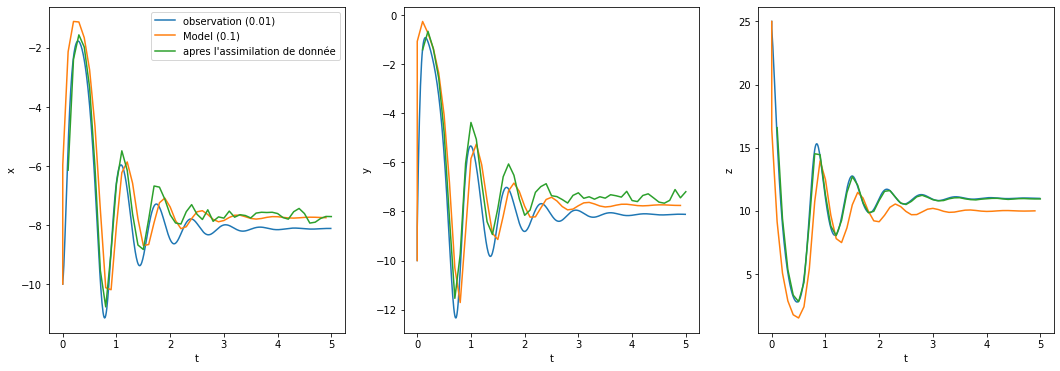

In [50]:
def hx_z(x):
   return np.array([x[2]])



R_z = np.eye(1)*0.01  # matrice de cov associer a la mesure

def read_sensor_z(index):
    return np.array([lorenz1[2][index]])



tab_z,tab_temps,tab_cov_z=assimilation_donnée(x,read_sensor_z,P,Q,R_z,1,dt,N,40,hx_z,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_z)

